# **Make images clean** #

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split

train_df = pd.read_csv('train.csv', header = 0)
train, test = train_test_split(train_df, test_size = 0.2)
x_train = train.drop(['label'], axis = 1 )
y_train = train['label']
x_test = test.drop(['label'], axis = 1 )
y_test = test['label']

In [4]:
noise = np.random.randint(0,100, (len(x_train), 784))
x_train_noise = x_train + noise
noise = np.random.randint(0,100, (len(x_test), 784))
x_test_noise = x_test + noise
y_train_noise = x_train
y_test_noise = x_test

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_noise, y_train_noise)

KNeighborsClassifier()

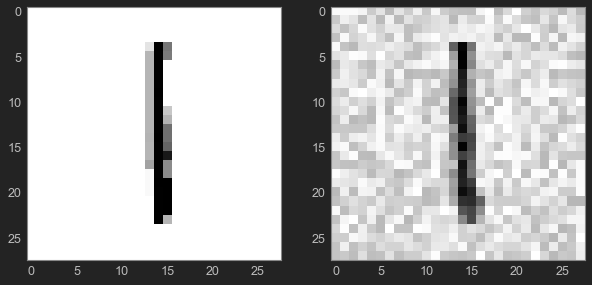

In [6]:
cleaned = knn_clf.predict([x_test_noise.iloc[2]])
fig = plt.figure()
fig.set_size_inches(10,5)
ax_1 = fig.add_subplot(1,2,1)
ax_2 = fig.add_subplot(1,2,2)

ax_1.imshow(cleaned.reshape(28,28), cmap = 'binary')
ax_2.imshow(x_test_noise.iloc[2].values.reshape(28,28), cmap = 'binary')